<a href="https://colab.research.google.com/github/wjdrnqja9/TIL/blob/main/%ED%8C%A8%EC%8A%A4%ED%8A%B8%EC%BA%A0%ED%8D%BC%EC%8A%A4_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [ ]:
# 한글 글꼴 설치 
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconf

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/패스트캠퍼스 데이터분석/파이널프로젝트_RAW_210329_210926.xlsx')
df.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,110500.0,NaN,VBANK,개발자 커리어,NaT
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14


## 데이터 타입과 결측값 확인하기

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105419 entries, 0 to 105418
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      105419 non-null  int64         
 1   customer_id             105416 non-null  float64       
 2   course_id               100212 non-null  float64       
 3   type                    105419 non-null  object        
 4   state                   105419 non-null  object        
 5   course_title            105403 non-null  object        
 6   category_title          105395 non-null  object        
 7   format                  105403 non-null  object        
 8   completed_at            105419 non-null  datetime64[ns]
 9   transaction_amount      105419 non-null  int64         
 10  coupon_title            31817 non-null   object        
 11  coupon_discount_amount  31817 non-null   float64       
 12  sale_price              104291

In [ ]:
df.isna().sum()

id                            0
customer_id                   3
course_id                  5207
type                          0
state                         0
course_title                 16
category_title               24
format                       16
completed_at                  0
transaction_amount            0
coupon_title              73602
coupon_discount_amount    73602
sale_price                 1128
tax_free_amount            1128
pg                        15075
method                    13096
subcategory_title         19829
marketing_start_at        17979
dtype: int64

## 데이터 분포 확인하기

In [ ]:
df['type'].unique()

array(['ORDER', 'PAYMENT', 'REFUND', 'TRANSACTION'], dtype=object)

In [ ]:
df['state'].unique()

array(['CANCELLED', 'COMPLETED', 'PENDING', 'DELETED', 'REQUESTED'],
      dtype=object)

In [ ]:
df['category_title'].unique()

array(['프로그래밍', '영상/3D', '업무 생산성', '크리에이티브', '부동산/금융', '데이터사이언스', '디자인',
       '마케팅', '교육', '투자/재테크', nan, '관리', '데이터 사이언스', '비즈니스', '지식콘텐츠',
       '일러스트', '파이낸스'], dtype=object)

In [ ]:
df['format'].unique()

array(['올인원', '스쿨 온라인', '온라인 완주반', 'RED', 'B2B 온라인', '캠프', '스쿨', nan,
       'B2B', '이벤트', '하루10분컷', '아카이브', '관리', '온라인', 'MBA', '콜로소', 'B2G'],
      dtype=object)

In [ ]:
df['method'].unique()

array(['VBANK', 'CARD', 'TRANS', 'PROMOTION', 'TRANSFER', 'ONSITE',
       'B2B_CONTRACT', nan, 'POINT', 'VOUCHER'], dtype=object)

In [ ]:
df['subcategory_title'].unique()

array(['개발자 커리어', '영상 편집', nan, 'PPT/보고서', '금융/투자 실무', '프론트엔드 개발',
       'DevOps', 'UX/UI', '머신러닝', '모션그래픽', '딥러닝/인공지능', '글쓰기/카피라이팅',
       '디지털마케팅', '엑셀/VBA', '데이터분석', '디자인툴', '모바일앱', '업무자동화', 'SNS마케팅',
       '게임', '회계/재무/세무', '부동산 개발', '시각디자인', '백엔드 개발', '데이터마케팅', '일러스트',
       '부동산 투자', '코딩 입문', '커뮤니케이션', '리더십', '주식 투자', '게임 그래픽', '데이터엔지니어링',
       'VFX'], dtype=object)

In [ ]:
# 한 사람이 강의를 몇 회 구매했는지
df["customer_id"].value_counts() 

98685.0     78
50769.0     62
40783.0     59
496508.0    54
427973.0    51
            ..
437600.0     1
551107.0     1
551096.0     1
551091.0     1
610626.0     1
Name: customer_id, Length: 53753, dtype: int64

In [ ]:
df.customer_id.value_counts().loc[df.customer_id.value_counts() == 1]

632586.0    1
606098.0    1
659284.0    1
606076.0    1
599900.0    1
           ..
437600.0    1
551107.0    1
551096.0    1
551091.0    1
610626.0    1
Name: customer_id, Length: 28583, dtype: int64

In [ ]:
repeat = df.customer_id.value_counts().loc[df.customer_id.value_counts() >= 2]
repeat_index=repeat.index
repeat_index

Float64Index([ 98685.0,  50769.0,  40783.0, 496508.0, 427973.0,  23171.0,
              158374.0,  20784.0, 106662.0, 276705.0,
              ...
              521362.0, 521978.0, 481061.0,  82432.0, 641876.0, 131743.0,
              667084.0, 521982.0, 410982.0,  20735.0],
             dtype='float64', length=25170)

In [ ]:
repeat_index.isin([98685.0])

array([ True, False, False, ..., False, False, False])

In [ ]:
df["customer_id"].value_counts() >= 2

98685.0      True
50769.0      True
40783.0      True
496508.0     True
427973.0     True
            ...  
437600.0    False
551107.0    False
551096.0    False
551091.0    False
610626.0    False
Name: customer_id, Length: 53753, dtype: bool

In [ ]:
repeat_index.isin([98685]).any() == True

True

In [ ]:
def repeat_order_func(x) :       

    if repeat_index.isin([x]).any()==True:
        return True
    else:
        return False

df['repeat_order'] = df['customer_id'].map(repeat_order_func)


In [ ]:
df['repeat_order'].value_counts()

True     76833
False    28586
Name: repeat_order, dtype: int64

In [ ]:
 df.head(1)

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,...,tax_free_amount,pg,method,subcategory_title,marketing_start_at,period,completed_month,completed_weekday,completed_day,repeat_order
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,...,110500.0,NaN,VBANK,개발자 커리어,NaT,NaT,None,일요일,NaN,NaN


In [ ]:
# 강의를 1회만 구매한 사람 비율
one = df.customer_id.value_counts().loc[df.customer_id.value_counts() == 1]  

len(one)/len(df.customer_id.value_counts()) * 100

53.17470652800774

In [ ]:
one

632586.0    1
606098.0    1
659284.0    1
606076.0    1
599900.0    1
           ..
437600.0    1
551107.0    1
551096.0    1
551091.0    1
610626.0    1
Name: customer_id, Length: 28583, dtype: int64

강의를 1회만 구매한 사람이 전체의 53%

In [ ]:
catitle = df["category_title"].value_counts()
catitle

프로그래밍       34430
데이터사이언스     14076
업무 생산성      13323
디자인         12009
영상/3D       10260
마케팅          9857
부동산/금융       5523
투자/재테크       2501
크리에이티브       2250
교육           1031
지식콘텐츠          56
비즈니스           42
파이낸스           25
데이터 사이언스        9
관리              2
일러스트            1
Name: category_title, dtype: int64

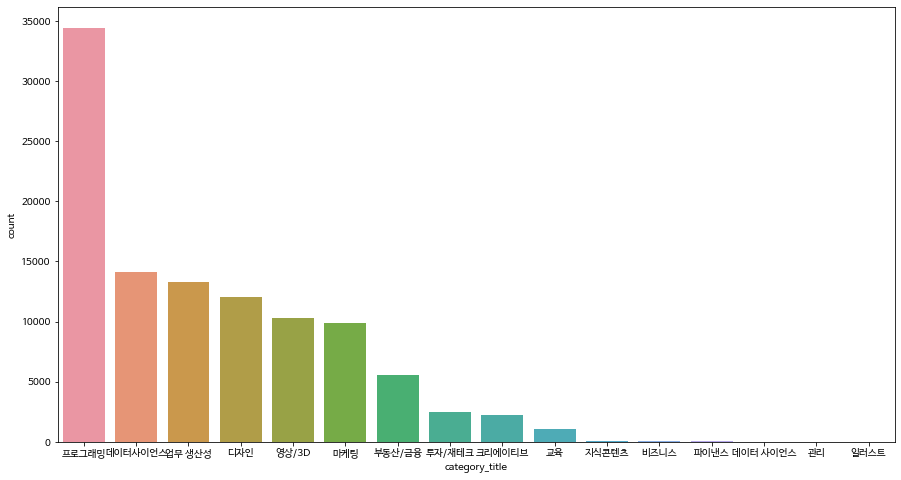

In [ ]:
fig = plt.figure(figsize=(15,8))
sns.countplot( data = df, x = 'category_title' , 
              order = df['category_title'].value_counts().index )

프로그래밍 관련 강의가 가장 많이 팔렸다.

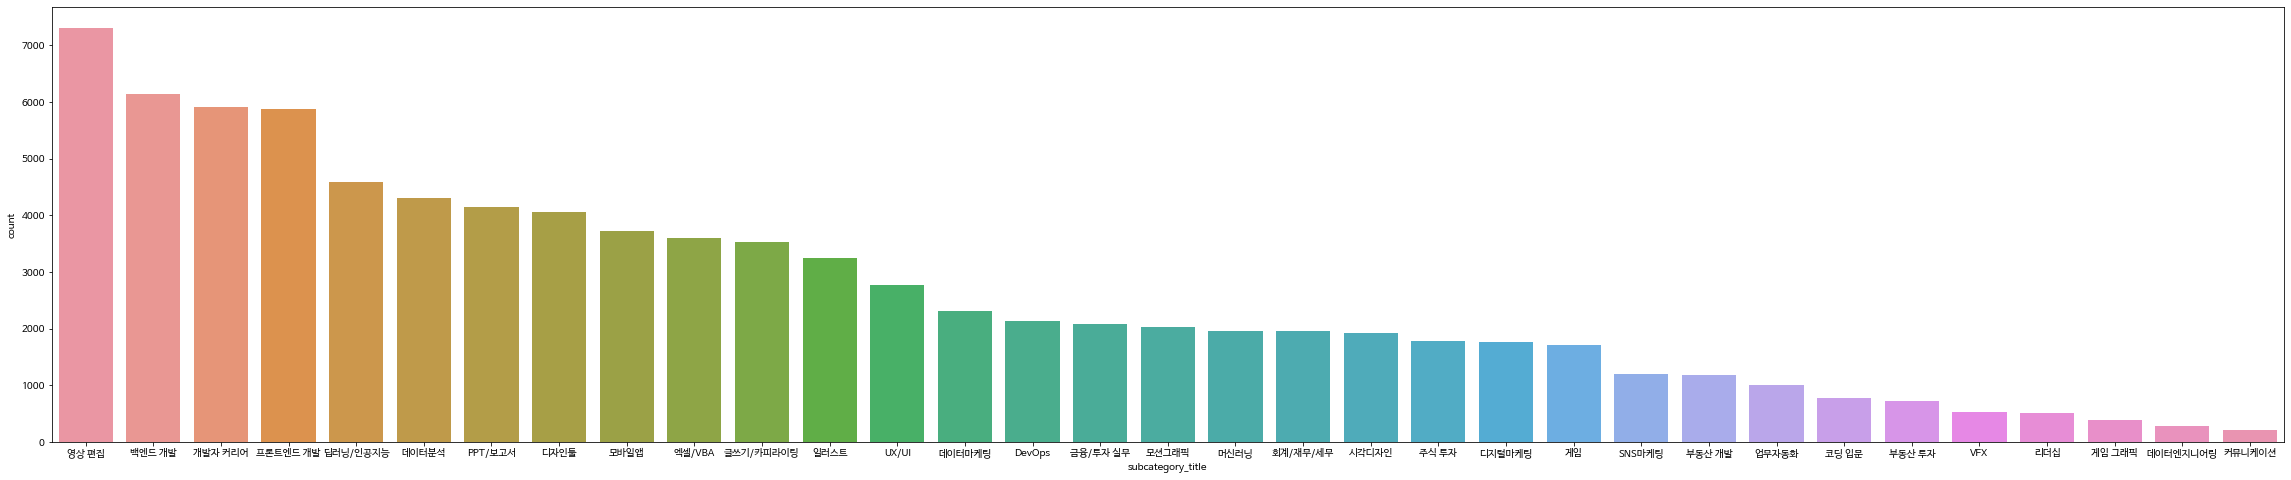

In [ ]:
fig = plt.figure(figsize=(40,8))
sns.countplot(data = df, x = "subcategory_title", 
              order = df['subcategory_title'].value_counts().index)

하지만 subcategory로 분류시 영상 편집 강의가 가장 많았다.

In [ ]:
sub = df.groupby(['category_title', 'subcategory_title'])[['id']].count()
sub.head()

id
category_title subcategory_title      
데이터사이언스        데이터분석              4302
               데이터엔지니어링            275
               딥러닝/인공지능           4590
               머신러닝               1958
디자인            UX/UI              2775

In [ ]:
# 트리맵 해보기

In [ ]:
# 카테고리 별 총 수입
how = {                                        
    'transaction_amount' : np.sum
}

catr = df.groupby('category_title').agg(how)
catr = catr.sort_values('transaction_amount', ascending=False)

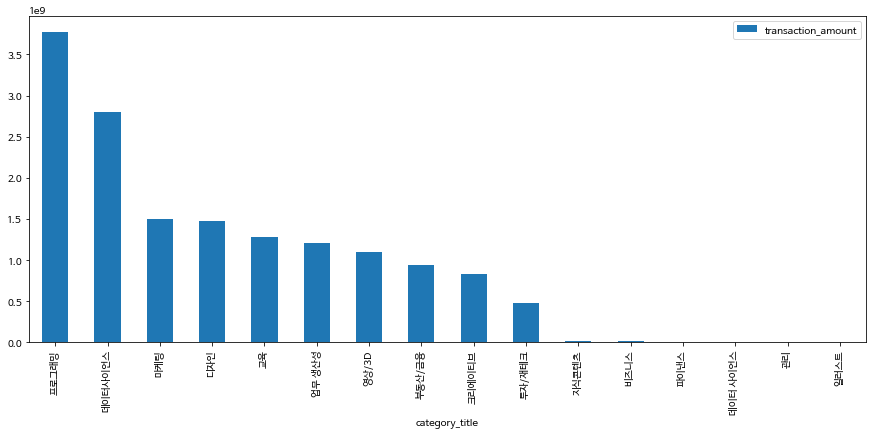

In [ ]:
catr.plot.bar(figsize = (15,6))

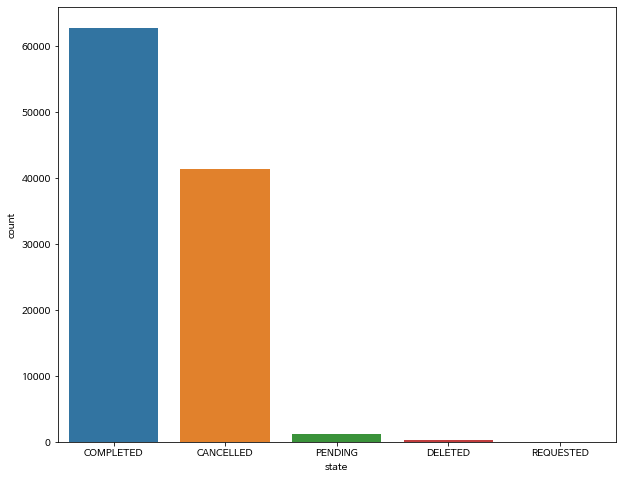

In [ ]:
fig = plt.figure(figsize=(10,8))
sns.countplot(data = df, x = "state", order = df['state'].value_counts().index)

In [ ]:
df['period']=df['completed_at']-df['marketing_start_at']
df.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at,period
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,110500.0,NaN,VBANK,개발자 커리어,NaT,NaT
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02,116 days 15:16:53
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04,24 days 15:21:43
3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,190900.0,190900.0,NaN,CARD,NaN,2021-03-04,24 days 15:21:43
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14,500 days 15:21:54


In [ ]:
df['period'].describe()

count                          87440
mean     180 days 22:47:03.021569074
std      203 days 07:48:39.787014818
min                -7 days +04:12:20
25%          30 days 15:02:25.500000
50%                101 days 12:51:49
75%                250 days 22:05:53
max                950 days 16:45:00
Name: period, dtype: object

In [ ]:
df_refund = df[df.type=='REFUND']
df_refund.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at,period
651,972377,444760.0,204122.0,REFUND,COMPLETED,퍼포먼스 마케터 되기 온라인 완주반 2기,마케팅,온라인 완주반,2021-03-29 09:24:43,-147000,NaN,NaN,404000.0,404000.0,NaN,VBANK,NaN,NaT,NaT
652,972381,472666.0,203178.0,REFUND,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-29 09:26:13,-96000,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02,117 days 09:26:13
666,972409,447177.0,203989.0,REFUND,COMPLETED,올인원 패키지 : 소금툰과 함께 캐릭터 드로잉/굿즈/임티/컷툰,디자인,올인원,2021-03-29 09:40:54,-79000,NaN,NaN,89000.0,89000.0,NaN,CARD,일러스트,2021-02-19,38 days 09:40:54
672,972422,373915.0,204264.0,REFUND,COMPLETED,데이터분석 프로젝트+자격증 온라인 완주반 3기,데이터사이언스,온라인 완주반,2021-03-29 09:44:01,-340000,NaN,NaN,340000.0,340000.0,NaN,VBANK,NaN,2021-03-08,21 days 09:44:01
675,972436,456086.0,NaN,REFUND,COMPLETED,프로모션 :연봉 앞자리가 바뀌는 프론트엔드 한끝세트 (3월 프리패스),프로그래밍,올인원,2021-03-29 09:47:17,-299000,NaN,NaN,299000.0,299000.0,NaN,CARD,NaN,NaT,NaT


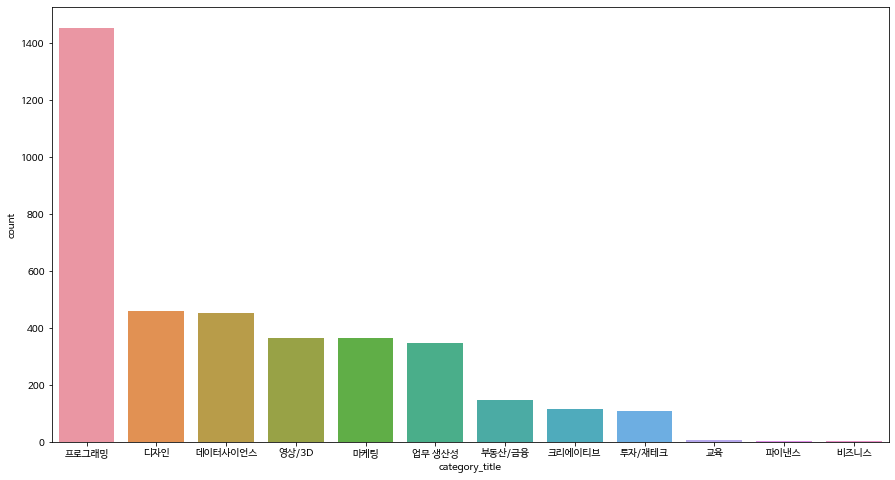

In [ ]:
# 카테고리별 환불 횟수
fig = plt.figure(figsize=(15,8))                    
sns.countplot( data = df_refund, x = 'category_title' , 
              order = df_refund['category_title'].value_counts().index )

In [ ]:
# type 열에서 PAYMENT, REFUND 이외 제거
df_ORDER_delete = df[df.type.isin(['PAYMENT', 'REFUND'])]  
df_ORDER_delete.head(2)

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at,period
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04,24 days 15:21:43
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14,500 days 15:21:54


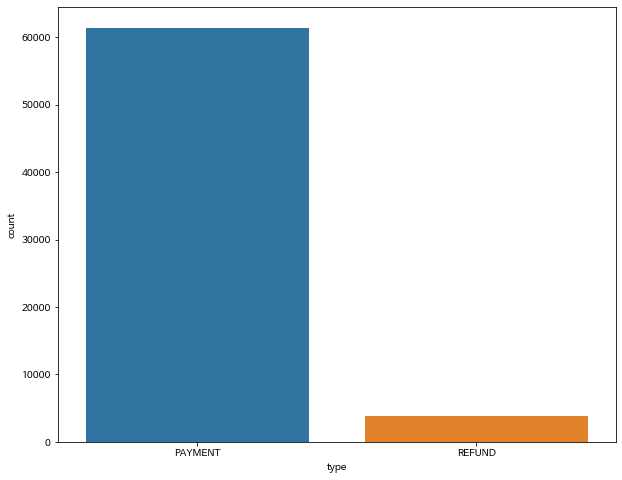

In [ ]:
# 결제, 환불 count
fig = plt.figure(figsize=(10,8)) 
sns.countplot(data = df_ORDER_delete, x = "type", order = df_ORDER_delete['type'].value_counts().index)

In [ ]:
df_refund_rate=df_refund['category_title'].value_counts()/df_ORDER_delete['category_title'].value_counts()*100 # 환불 비율
df_refund_rate = df_refund_rate.sort_values(ascending=False)
df_refund_rate

크리에이티브      10.458716
파이낸스         8.000000
프로그래밍        6.705996
마케팅          6.351140
디자인          6.124083
영상/3D        5.631636
비즈니스         5.555556
데이터사이언스      5.429051
투자/재테크       5.376884
업무 생산성       4.414391
부동산/금융       4.270052
교육           0.613497
관리                NaN
데이터 사이언스          NaN
지식콘텐츠             NaN
Name: category_title, dtype: float64

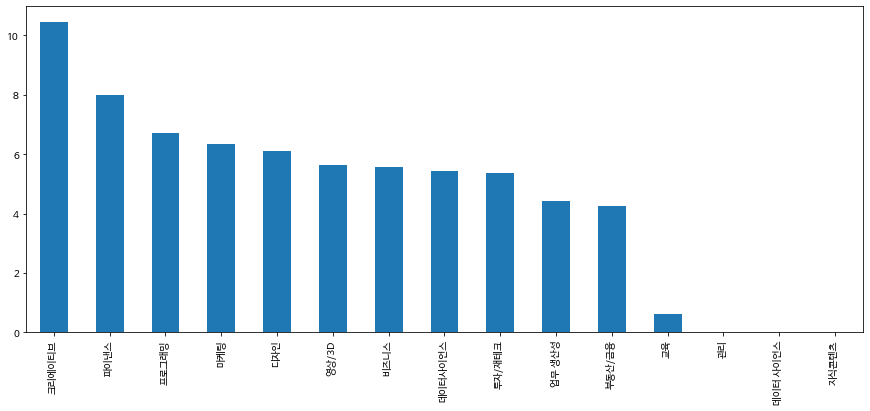

In [ ]:
# 카테고리 별 환불 비율 그래프
df_refund_rate.plot.bar(figsize = (15,6)) 

In [ ]:
df['completed_at'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                  105419
unique                  98573
top       2021-04-28 15:04:48
freq                       27
first     2021-03-28 15:00:11
last      2021-09-25 14:25:47
Name: completed_at, dtype: object

In [ ]:
# 결제 월 컬럼 추가
def func(x) :                                     

    if datetime.date(2021,4,1) <= x < datetime.date(2021,5,1):   # 3월은 28일부터, 9월은 25일까지밖에 없으므로 제외
        return "4월"
    elif datetime.date(2021,5,1) <= x < datetime.date(2021,6,1):
        return "5월"
    elif datetime.date(2021,6,1) <=  x < datetime.date(2021,7,1):
        return "6월"
    elif datetime.date(2021,7,1) <=  x < datetime.date(2021,8,1):
        return "7월"
    elif datetime.date(2021,8,1) <= x < datetime.date(2021,9,1):
        return "8월"


df['completed_month'] = df['completed_at'].map(func)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == 

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,...,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at,period,completed_month,completed_weekday,completed_day
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,...,110500.0,110500.0,NaN,VBANK,개발자 커리어,NaT,NaT,None,일요일,NaN
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,...,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02,116 days 15:16:53,None,일요일,NaN
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,...,190900.0,190900.0,NaN,CARD,NaN,2021-03-04,24 days 15:21:43,None,일요일,NaN
3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,...,190900.0,190900.0,NaN,CARD,NaN,2021-03-04,24 days 15:21:43,None,일요일,NaN
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,...,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14,500 days 15:21:54,None,일요일,NaN


In [ ]:
# 월 별 총 수입
how = {                                        
    'transaction_amount' : np.sum
}

month_account = df.groupby('completed_month').agg(how)
month_account = month_account.sort_values('transaction_amount', ascending=False)

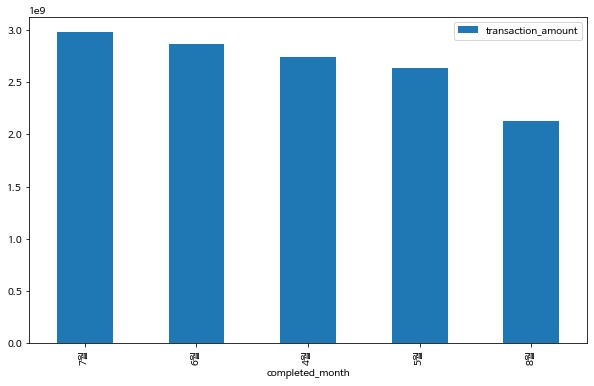

In [ ]:
# 월 별 총 수입 그래프  ->  매출 높은 시기에 광고 늘리기 (6~7월이 상대적으로 높게 나왔다.)
month_account.plot.bar(figsize = (10,6)) 

In [ ]:
def weekdays(x) :           
    if x.weekday() == 0: 
        return "월요일"
    elif x.weekday() == 1: 
        return "화요일"
    elif x.weekday() == 2: 
        return "수요일"
    elif x.weekday() == 3: 
        return "목요일"
    elif x.weekday() == 4: 
        return "금요일"
    elif x.weekday() == 5: 
        return "토요일"
    elif x.weekday() == 6: 
        return "일요일"        

df['completed_weekday'] = df['completed_at'].map(weekdays)
df.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,...,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at,period,completed_month,completed_weekday
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,...,NaN,110500.0,110500.0,NaN,VBANK,개발자 커리어,NaT,NaT,4월,일요일
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,...,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02,116 days 15:16:53,4월,일요일
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,...,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04,24 days 15:21:43,4월,일요일
3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,...,NaN,190900.0,190900.0,NaN,CARD,NaN,2021-03-04,24 days 15:21:43,4월,일요일
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,...,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14,500 days 15:21:54,4월,일요일


In [ ]:
# 요일 별 총 수입
how = {                                        
    'transaction_amount' : np.sum
}

weekday_account = df.groupby('completed_weekday').agg(how)
weekday_account = weekday_account.sort_values('transaction_amount', ascending=False)

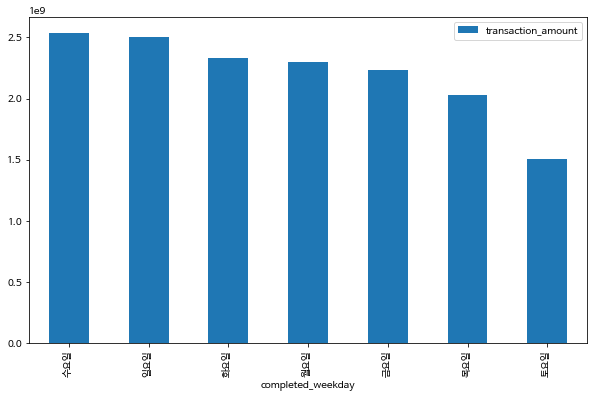

In [ ]:
# 요일 별 총 수입 그래프  ->  매출 높은 시기에 광고 늘리기 (수요일 ,일요일이 상대적으로 높게 나왔다.)
weekday_account.plot.bar(figsize = (10,6)) 

In [ ]:
x = datetime.date(2021,4,10)
x.day

10

In [ ]:
# 결제 일 컬럼 추가
def days(x) :  
    if x < datetime.date(2021,4,1) or x >= datetime.date(2021,9,1):     # 3월은 28일부터, 9월은 25일까지밖에 없으므로 제외
        return None
    else:          
        return x.day
    

df['completed_day'] = df['completed_at'].map(days)
df.loc[12000, 'completed_day']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  


11.0

In [ ]:
# 일 별 총 수입
how = {                                        
    'transaction_amount' : np.sum
}

day_account = df.groupby('completed_day').agg(how)
day_account = day_account.sort_values('transaction_amount', ascending=False)

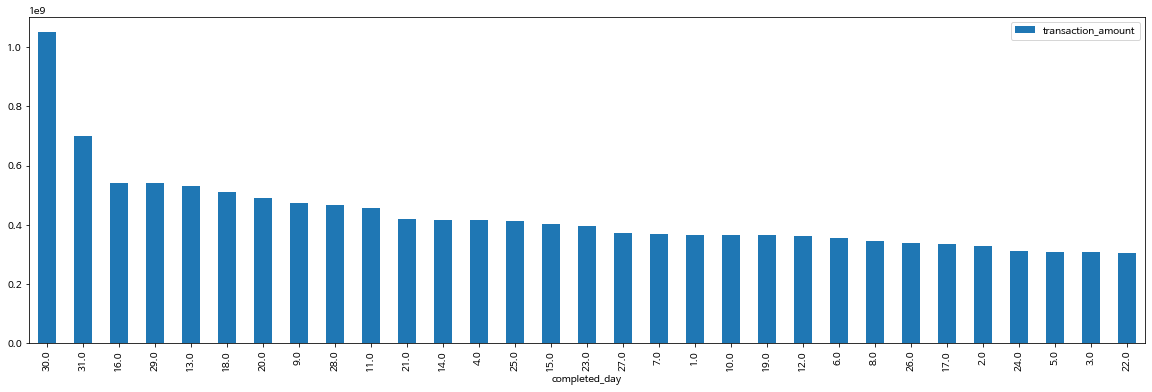

In [ ]:
# 일 별 총 수입 그래프  ->  매출 높은 시기에 광고 늘리기 (월 말이 매우 높게 나왔다.)
day_account.plot.bar(figsize = (20,6)) 

In [ ]:
# 월 말에 가장 잘 팔리는 강의 카테고리


1

In [ ]:
df2['customer_id'] .value_counts() >=2